## Importing libraries 

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [240]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [241]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"

In [242]:
df =pd.read_csv("hotaldataClean1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87230 entries, 0 to 87229
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   87230 non-null  int64  
 1   LeadTime                     87230 non-null  int64  
 2   ArrivalDateYear              87230 non-null  int64  
 3   ArrivalDateMonth             87230 non-null  object 
 4   ArrivalDateWeekNumber        87230 non-null  int64  
 5   ArrivalDateDayOfMonth        87230 non-null  int64  
 6   StaysInWeekendNights         87230 non-null  int64  
 7   StaysInWeekNights            87230 non-null  int64  
 8   Adults                       87230 non-null  int64  
 9   Children                     87230 non-null  float64
 10  Babies                       87230 non-null  int64  
 11  Meal                         87230 non-null  object 
 12  Country                      87230 non-null  object 
 13  MarketSegment   

## Modifying to relavant attribute types in the dataframe

In [243]:

df['ReservationStatusDate']= pd.to_datetime(df['ReservationStatusDate'])
df["IsCanceled"] = df["IsCanceled"].astype("category")
df["ArrivalDateYear"] = df["ArrivalDateYear"].astype("category")
df["ArrivalDateMonth"] = df["ArrivalDateMonth"].astype("category")
df["Meal"] = df["Meal"].astype("category")
df["Country"] = df["Country"].astype("category")
df["MarketSegment"] = df["MarketSegment"].astype("category")
df["DistributionChannel"] = df["DistributionChannel"].astype("category")
df["IsRepeatedGuest"] = df["IsRepeatedGuest"].astype("category")
df["ReservedRoomType"] = df["ReservedRoomType"].astype("category")
df["AssignedRoomType"] = df["AssignedRoomType"].astype("category")
df["DepositType"] = df["DepositType"].astype("category")
df["Agent"] = df["Agent"].astype("category")
df["CustomerType"] = df["CustomerType"].astype("category")
df["ReservationStatus"] = df["ReservationStatus"].astype("category")
df["Hotal"] = df["Hotal"].astype("category")
df["Children"] = df["Children"].astype("int")

# Displaying Dataframe Structure

In [244]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87230 entries, 0 to 87229
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   87230 non-null  category      
 1   LeadTime                     87230 non-null  int64         
 2   ArrivalDateYear              87230 non-null  category      
 3   ArrivalDateMonth             87230 non-null  category      
 4   ArrivalDateWeekNumber        87230 non-null  int64         
 5   ArrivalDateDayOfMonth        87230 non-null  int64         
 6   StaysInWeekendNights         87230 non-null  int64         
 7   StaysInWeekNights            87230 non-null  int64         
 8   Adults                       87230 non-null  int64         
 9   Children                     87230 non-null  int64         
 10  Babies                       87230 non-null  int64         
 11  Meal                         87230 non-nu

# decsribing the stats for numerical attributes

In [245]:
df.describe().round(0) 

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0,87230.0
mean,80.0,27.0,16.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,107.0,0.0,1.0
std,86.0,14.0,9.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,10.0,55.0,0.0,1.0
min,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0
25%,11.0,16.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0
50%,49.0,27.0,16.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0
75%,125.0,37.0,23.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,134.0,0.0,1.0
max,737.0,53.0,31.0,19.0,50.0,55.0,10.0,10.0,26.0,72.0,18.0,391.0,5400.0,8.0,5.0


In [246]:
df.shape

(87230, 31)

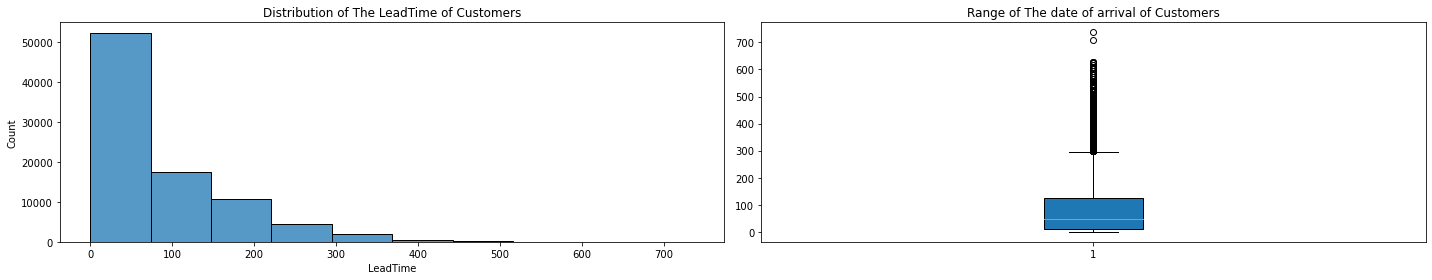

In [247]:
fig, axes = plt.subplots(1,2, figsize=(20,4))
sb.histplot(df['LeadTime'],bins=10,ax=axes[0])
plt.boxplot(df['LeadTime'],patch_artist = True)

axes[0].set_title('Distribution of The LeadTime of Customers')
axes[1].set_title('Range of The date of arrival of Customers')
plt.tight_layout()
#plt.savefig("hist of ArrivalDateDayOfMonth.png" )
plt.show()

In the histogram , I can see the customers lead times.  It is a distribution that is skewed to the right.   In addition, over 50000 customers have a lead time of up to 80 days.The outliers are represented by the boxplot in the LeadTime attribute.

Q1_LeadTime: 11 days
Q3_LeadTime: 125 days


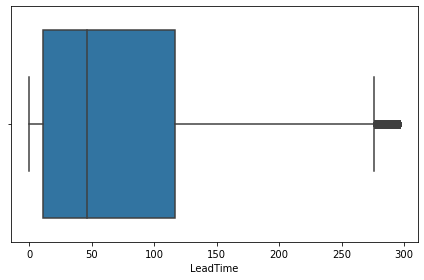

In [248]:
# Calculating Q1 for LeadTime attribute
median = np.median(df.LeadTime)
median
Q1_LeadTime = df.LeadTime.quantile(0.25)
print("Q1_LeadTime:",int(Q1_LeadTime),"days")
# Calculating Q3 for LeadTime attribute
Q3_LeadTime = df.LeadTime.quantile(0.75)
print("Q3_LeadTime:",int(Q3_LeadTime),"days")
# Calculating IQR for LeadTime attribute
IQR_LeadTime = Q3_LeadTime - Q1_LeadTime
# Calculating lower bound  for LeadTime attribute
lowerBound_LeadTime = Q1_LeadTime - (1.5 * IQR_LeadTime)
# Calculating lower bound  for LeadTime attribute
upperBound_LeadTime = Q3_LeadTime + (1.5 * IQR_LeadTime)
# removing the outlier 
index=df['LeadTime'][(df['LeadTime']>upperBound_LeadTime)].index
df.drop(index,inplace=True)

# Visualizing distribution of LeadTime attribute
sb.boxplot(x = 'LeadTime', data = df)
plt.tight_layout()
#plt.savefig("hist of ArrivalDateWeekNumber.png" )
plt.show()

In the boxplot, I can see that 25% of customers have a lead time less than 11 days and 25% have a lead time greater than 125 days.

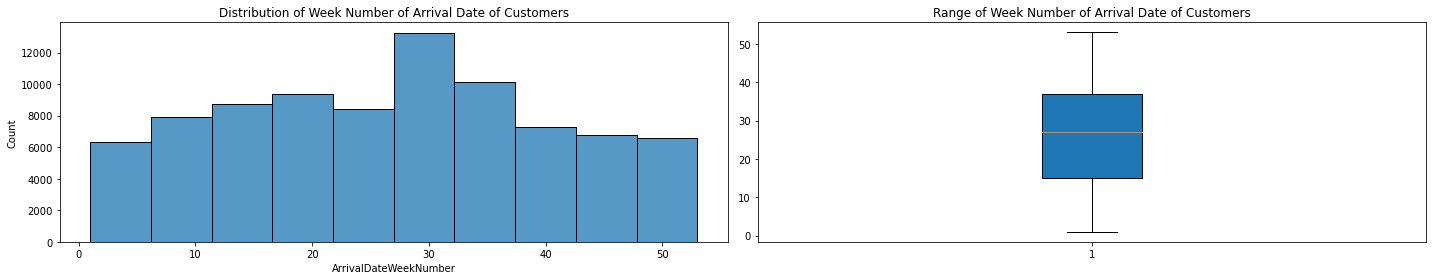

Q1: 15 week
Q3: 37 week


In [249]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

sb.histplot(df['ArrivalDateWeekNumber'],bins=10,ax=axes[0])
plt.boxplot(df['ArrivalDateWeekNumber'],patch_artist = True)

axes[0].set_title('Distribution of Week Number of Arrival Date of Customers')
axes[1].set_title('Range of Week Number of Arrival Date of Customers')
plt.tight_layout()
#plt.savefig("hist of ArrivalDateWeekNumber.png" )
plt.show();
# Calculating Q1 for LeadTime attribute
median = np.median(df.ArrivalDateWeekNumber)
median
Q1 = df.ArrivalDateWeekNumber.quantile(0.25)
print("Q1:",int(Q1),"week")
# Calculating Q3 for LeadTime attribute
Q3 = df.ArrivalDateWeekNumber.quantile(0.75)
print("Q3:",int(Q3),"week")

I can see the distribution of customer arrival week numbers in the histogram is symmetric. In addition, between weeks 25 and 30, about 14000 customers arrived.
From the boxplot, I can see that 25% of customers arrived before week 15, and 25% of customers arrived after week 37.

Q1: 8 day of the month
Q3: 23 day of the month


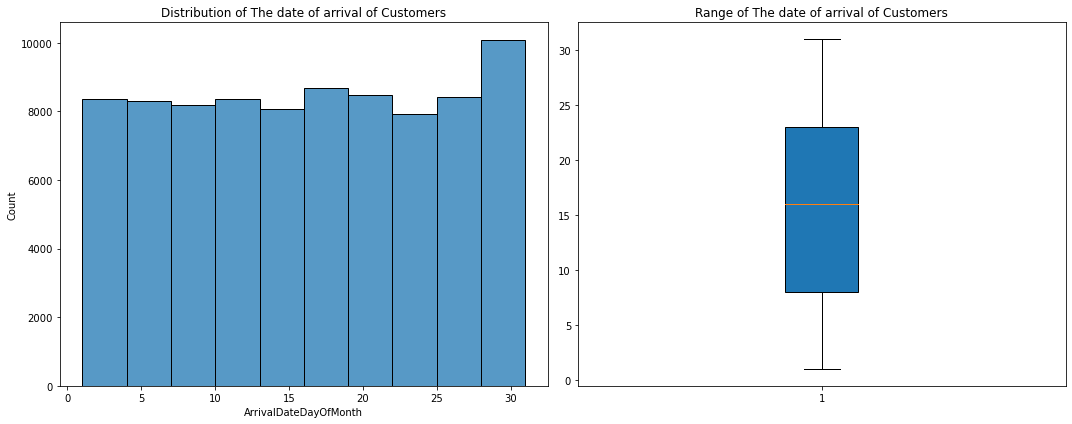

In [250]:
Q1 = df.ArrivalDateDayOfMonth.quantile(0.25)
print("Q1:",int(Q1),"day of the month")
# Calculating Q3 for LeadTime attribute
Q3 = df.ArrivalDateDayOfMonth.quantile(0.75)
print("Q3:",int(Q3),"day of the month")
fig, axes = plt.subplots(1,2, figsize=(15,6))
sb.histplot(df['ArrivalDateDayOfMonth'],bins=10,ax=axes[0])
plt.boxplot(df['ArrivalDateDayOfMonth'],patch_artist = True)

axes[0].set_title('Distribution of The date of arrival of Customers')
axes[1].set_title('Range of The date of arrival of Customers')
plt.tight_layout()
#plt.savefig("hist of ArrivalDateDayOfMonth.png" )
plt.show()

I see that the customer arrival day of the month is distributed uniformly. Furthermore, in the final week of the month, nearly 10,000 customers arrived.
According to the boxplot, 25% of clients arrived in the first week of the month, and 25% in the last week.

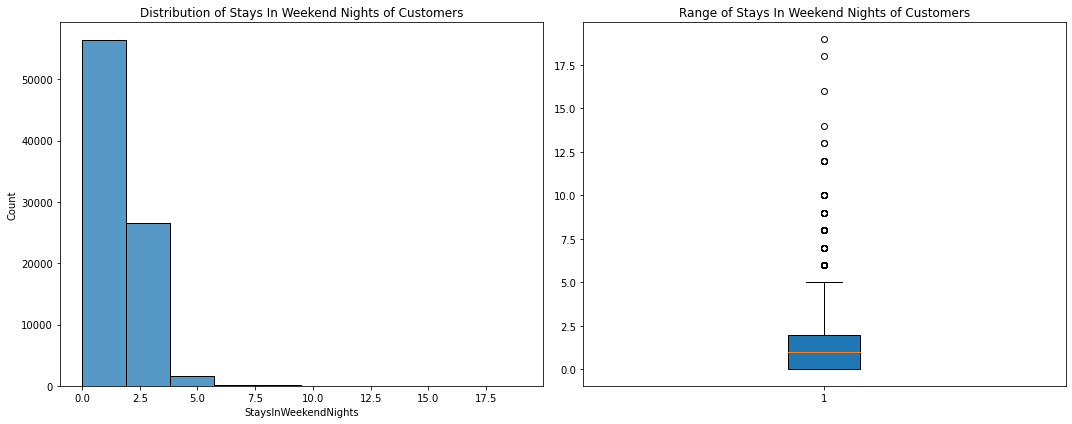

In [251]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['StaysInWeekendNights'],bins=10,ax=axes[0])
plt.boxplot(df['StaysInWeekendNights'],patch_artist=True)
 
axes[0].set_title('Distribution of Stays In Weekend Nights of Customers')
axes[1].set_title('Range of Stays In Weekend Nights of Customers')
plt.tight_layout()
#plt.savefig("hist of StaysInWeekendNights.png" )
plt.show()

I can view the distribution of stays in the hotel of Customers in the histogram. It's a right-skewed distribution. Furthermore, about 50000 customers stay for 0 to 2 nights over the weekend. The outlier is contained in the attribute, as seen by the boxplot.

Q1: 0 week nights over the weekend
Q3: 2 week nights over the weekend


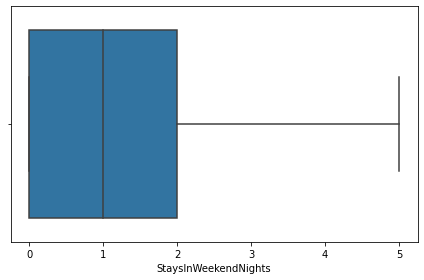

In [252]:
# Calculating Q1 for StaysInWeekendNights attribute
Q1 = df.StaysInWeekendNights.quantile(0.25)
print("Q1:",int(Q1),"week nights over the weekend")
# Calculating Q3 for StaysInWeekendNights attribute
Q3 = df.StaysInWeekendNights.quantile(0.75)
print("Q3:",int(Q3),"week nights over the weekend")
# Calculating IQR for StaysInWeekendNights attribute
IQR_StaysInWeekendNights = Q3 - Q1
# Calculating lower bound  for StaysInWeekendNights attribute
lowerBound_StaysInWeekendNights = Q1 - (1.5 * IQR_StaysInWeekendNights)
# Calculating lower bound  for StaysInWeekendNights attribute
upperBound_StaysInWeekendNights = Q3 + (1.5 * IQR_StaysInWeekendNights)

# removing the outlier 
index=df['StaysInWeekendNights'][(df['StaysInWeekendNights']>upperBound_StaysInWeekendNights)].index
df.drop(index,inplace=True)


# Visualizing distribution of StaysInWeekendNights attribute
sb.boxplot(x = 'StaysInWeekendNights', data = df)
plt.tight_layout()
#plt.savefig("boxplot of StaysInWeekendNights.png" )
plt.show()

I can see from the boxplot that 25% of clients spend no nights over the weekend and 25% have a spend time of more than 2 week nights over the weekend.

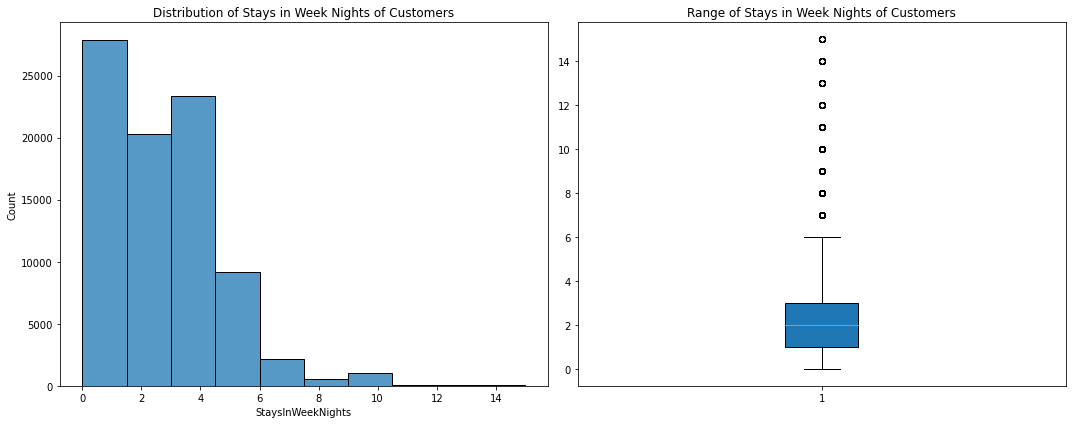

In [253]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['StaysInWeekNights'],bins= 10,ax=axes[0])  
plt.boxplot(df['StaysInWeekNights'],patch_artist=True) 
axes[0].set_title('Distribution of Stays in Week Nights of Customers')
axes[1].set_title('Range of Stays in Week Nights of Customers')
plt.tight_layout()
#plt.savefig("hist of StaysInWeekNights.png" )
plt.show()

In the histogram, I can see the distribution of Customer stays in the hotel.The distribution is right-skewed. Furthermore, during the week, around 70000 customers stay for 0 to 5 nights. As shown by the boxplot, the outlier is contained within the attribute.

Q1: 1 week nights throughout the week
Q3: 3 week nights throughout the week


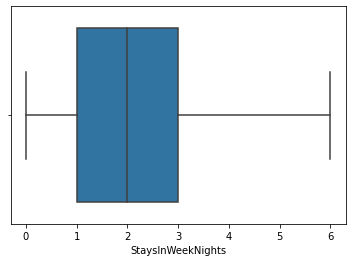

In [254]:
# Calculating Q1 for StaysInWeekNights attribute
Q1 = df.StaysInWeekNights.quantile(0.25)
print("Q1:",int(Q1),"week nights throughout the week")
# Calculating Q3 for StaysInWeekNights attribute
Q3 = df.StaysInWeekNights.quantile(0.75)
print("Q3:",int(Q3),"week nights throughout the week")
# Calculating IQR for StaysInWeekNights attribute
IQR_StaysInWeekNights = Q3 - Q1
# Calculating lower bound  for StaysInWeekNights attribute
upperBound_StaysInWeekNights = Q3 + (1.5 * IQR_StaysInWeekNights)
# removing the outlier 
index=df['StaysInWeekNights'][(df['StaysInWeekNights']>upperBound_StaysInWeekNights)].index
df.drop(index,inplace=True)

# Visualizing distribution of StaysInWeekNights attribute
sb.boxplot(x = 'StaysInWeekNights', data = df)
#plt.savefig("hist of StaysInWeekNights.png" )
plt.show()

I can see from the boxplot that 25% of Customers do not spend any nights during the week and 25% spend more than 4 week nights throughout the week.

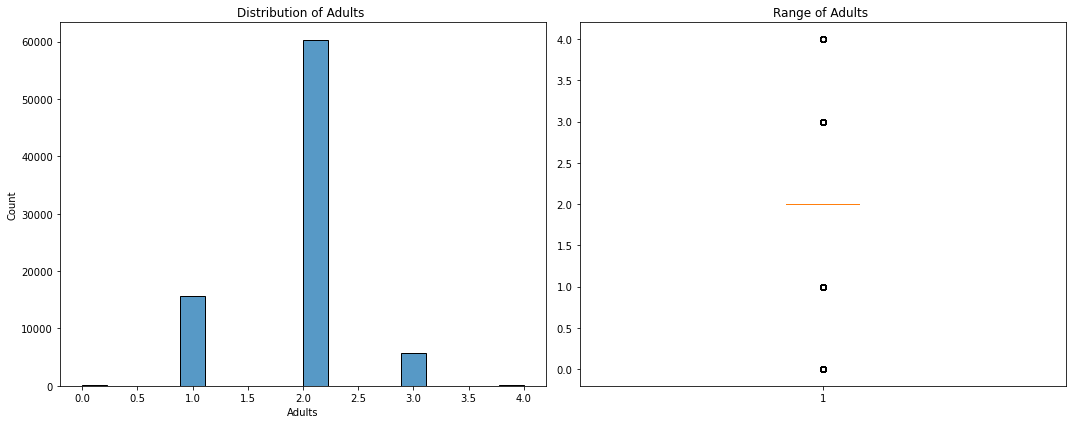

In [255]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Adults'],ax=axes[0])  


plt.boxplot(df['Adults'],patch_artist=True) 
axes[0].set_title('Distribution of Adults ')
axes[1].set_title('Range of Adults ')
plt.tight_layout()
#plt.savefig("hist of Adults.png" )
plt.show()

It shows that 19% of hotel reservations have one adult, 73% have two adults, and 7% have more than two adults.

In [256]:
# Calculating Q1 for Adults attribute
Q1_Adults = df.Adults.quantile(0.25)
# Calculating Q3 for Adults attribute
Q3_Adults = df.Adults.quantile(0.75)
# Calculating IQR for Adults attribute
IQR_Adults = Q3_Adults - Q1_Adults
# Calculating lower bound  for Adults attribute
upperBound_Adults = Q3_Adults + (1.5 * IQR_Adults)
# Calculating lower bound  for LeadTime attribute
lowerBound_Adults = Q1_Adults - (1.5 * IQR_Adults)
# removing the outlier 
index=df['Adults'][(df['Adults']>upperBound_Adults)|(df['Adults']<lowerBound_Adults)].index
df.drop(index,inplace=True)


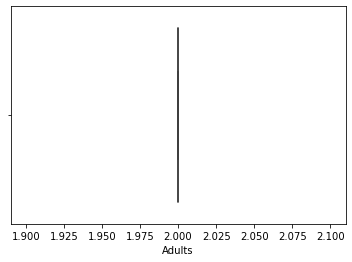

In [257]:
# Visualizing distribution of Adults attribute
sb.boxplot(x = 'Adults', data = df)
#plt.savefig("boxplot of Adults.png" )
plt.show()

In the above boxplot, Q1 = Q3 = median = 2

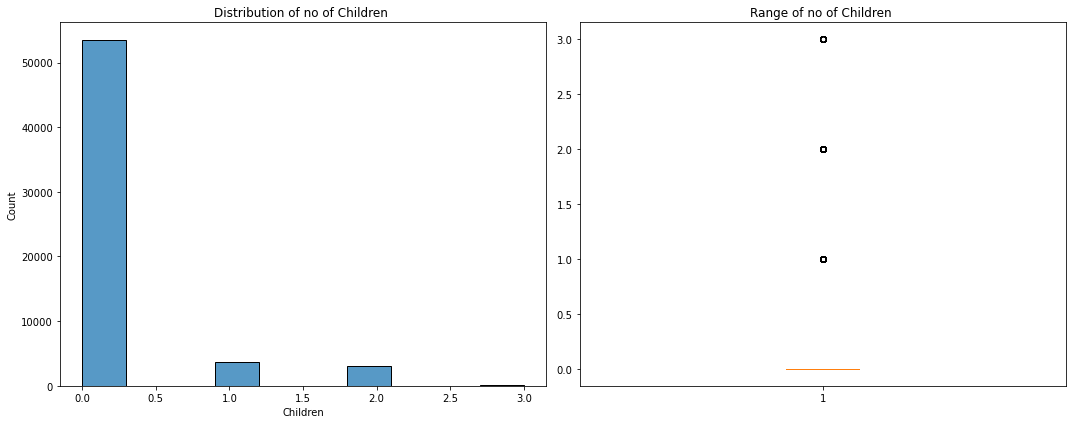

In [258]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Children'],bins= 10,ax=axes[0])  


plt.boxplot(df['Children'],patch_artist=True) 
axes[0].set_title('Distribution of no of Children ')
axes[1].set_title('Range of no of Children ')
plt.tight_layout()
#plt.savefig("hist of Children.png" )
plt.show()

It demonstrates that 88% of clients do not have Children. Only approximately 6% of customers have only one Children, approximately 5% of customers have only two Children and  while 0.02 percent have more than 2 Children.

In the above boxplot, Q1 = Q3 = median = 0

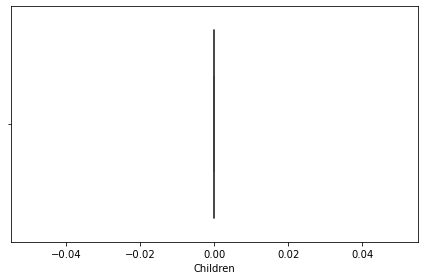

In [259]:
# Calculating Q1 for Children attribute
Q1_Children = df.Children.quantile(0.25)
# Calculating Q3 for Children attribute
Q3_Childrens = df.Children.quantile(0.75)
# Calculating IQR for Children attribute
IQR_Children = Q3_Childrens - Q1_Children
# Calculating lower bound  for Children attribute
upperBound_Children = Q3_Childrens + (1.5 * IQR_Children)

# removing the outlier 
index=df['Children'][(df['Children']>upperBound_Children)].index
df.drop(index,inplace=True)

# Visualizing distribution of Children attribute
sb.boxplot(x = 'Children', data = df)
plt.tight_layout()
#plt.savefig("boxplot of Children.png" )
plt.show()

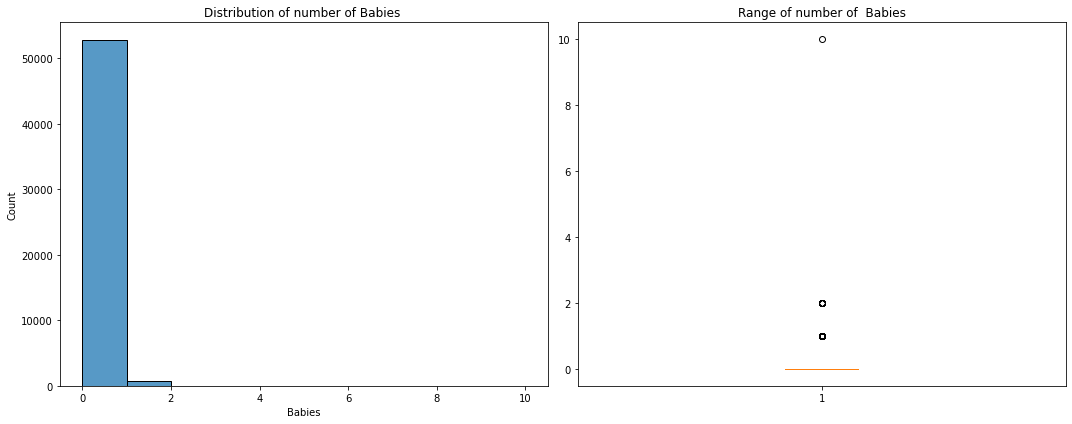

In [260]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['Babies'],bins= 10,ax=axes[0])  


plt.boxplot(df['Babies'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of number of Babies ')
axes[1].set_title('Range of number of  Babies')
plt.tight_layout()
#plt.savefig("hist of Babies.png" )
plt.show()

It demonstrates that 98% of clients do not have Babies. Only approximately 1% of customers have only one Babies, while 0.02 percent have two or more.

In the above boxplot, Q1 = Q3 = median = 0

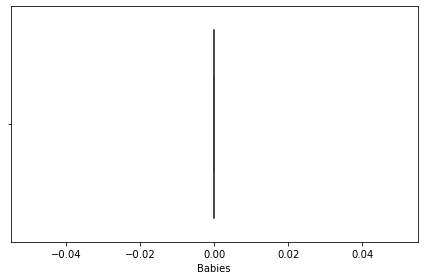

In [261]:
# Calculating Q1 for Babies attribute
Q1_Babies = df.Babies.quantile(0.25)
# Calculating Q3 for Babies attribute
Q3_Babies = df.Babies.quantile(0.75)
# Calculating IQR for Babies attribute
IQR_Babies = Q3_Babies - Q1_Babies
# Calculating lower bound  for Babies attribute
upperBound_Babies = Q3_Babies + (1.5 * IQR_Babies)
# removing the outlier 
index=df['Babies'][(df['Babies']>upperBound_Babies)].index
df.drop(index,inplace=True)

# Visualizing distribution of Babies attribute
sb.boxplot(x = 'Babies', data = df)
plt.tight_layout()
#plt.savefig("boxplot of Babies.png" )
plt.show()

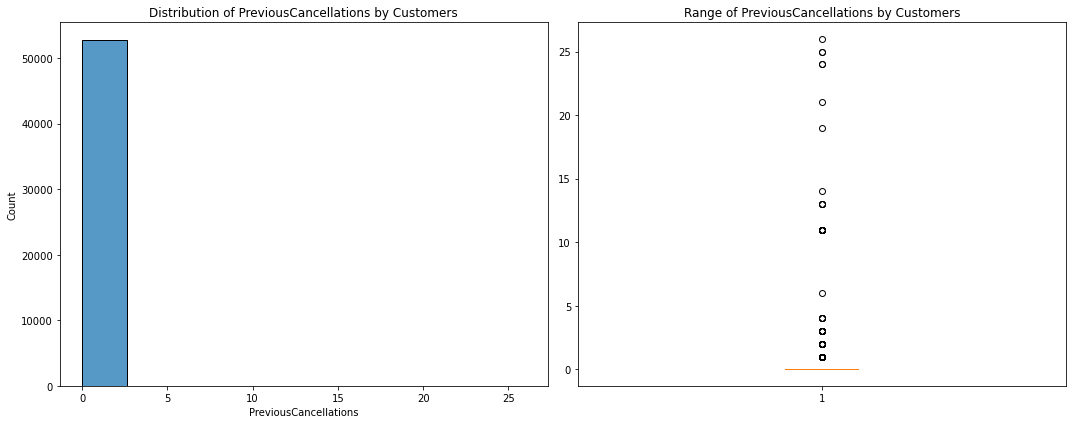

In [262]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['PreviousCancellations'],bins= 10,ax=axes[0])  


plt.boxplot(df['PreviousCancellations'],patch_artist=True) 
axes[0].set_title('Distribution of PreviousCancellations by Customers')
axes[1].set_title('Range of PreviousCancellations by Customers')
plt.tight_layout()
#plt.savefig("hist of PreviousCancellations.png" )
plt.show()

It reveals that 98% of previous bookings were not cancelled by the current customer, and only 1% of previous bookings were cancelled once or more.

In the above boxplot, Q1 = Q3 = median = 0

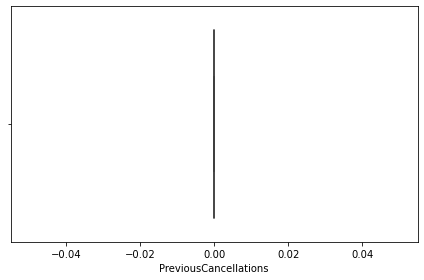

In [263]:
# Calculating Q1 for Babies attribute
Q1_PreviousCancellations = df.PreviousCancellations.quantile(0.25)
# Calculating Q3 for Babies attribute
Q3_PreviousCancellations = df.PreviousCancellations.quantile(0.75)
# Calculating IQR for Babies attribute
IQR_PreviousCancellations = Q3_PreviousCancellations - Q1_PreviousCancellations
# Calculating upperbound bound  for Babies attribute
upperBound_PreviousCancellations = Q3_PreviousCancellations + (1.5 * IQR_PreviousCancellations)
# removing the outlier 
index=df['PreviousCancellations'][(df['PreviousCancellations']>upperBound_PreviousCancellations)].index
df.drop(index,inplace=True)

# Visualizing distribution of Babies attribute
sb.boxplot(x = 'PreviousCancellations', data = df)
plt.tight_layout()
#plt.savefig("boxplot of PreviousCancellations.png" )
plt.show()

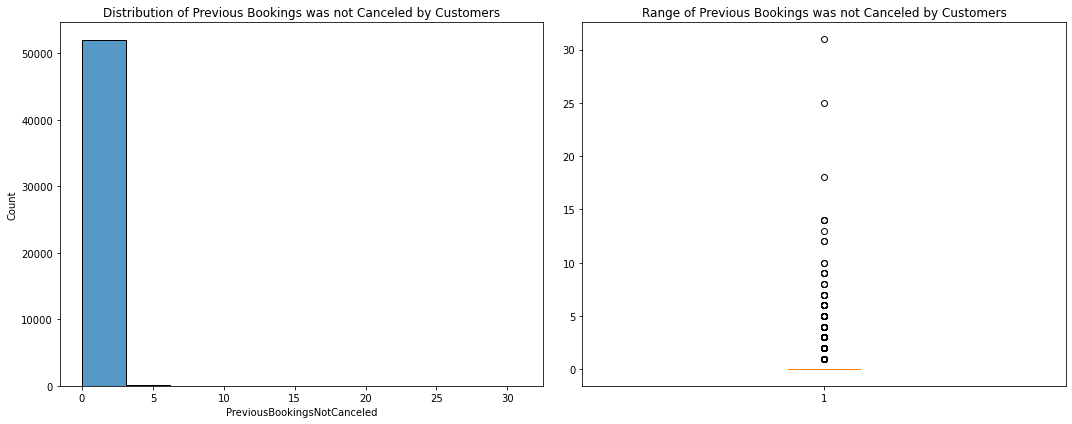

In [264]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['PreviousBookingsNotCanceled'],bins= 10,ax=axes[0])  


plt.boxplot(df['PreviousBookingsNotCanceled'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Previous Bookings was not Canceled by Customers')
axes[1].set_title('Range of Previous Bookings was not Canceled by Customers')
plt.tight_layout()
#plt.savefig("hist of PreviousBookingsNotCanceled.png" )
plt.show()

It shows that 98 percent of past bookings were not cancelled by the present customer, and just 0.8 percent of previous bookings were cancelled once.

In the above boxplot, Q1 = Q3 = median = 0

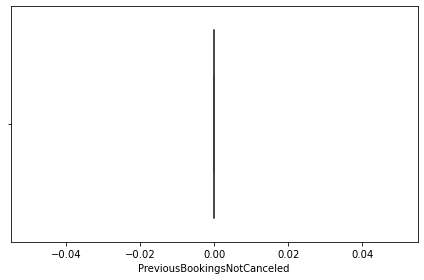

In [265]:
# Calculating Q1 for Babies attribute
Q1_PreviousBookingsNotCanceled = df.PreviousBookingsNotCanceled.quantile(0.25)
# Calculating Q3 for Babies attribute
Q3_PreviousBookingsNotCanceled = df.PreviousBookingsNotCanceled.quantile(0.75)
# Calculating IQR for Babies attribute
IQR_PreviousBookingsNotCanceled = Q3_PreviousBookingsNotCanceled - Q1_PreviousBookingsNotCanceled
# Calculating lower bound  for Babies attribute
upperBound_PreviousBookingsNotCanceled = Q3_PreviousBookingsNotCanceled + (1.5 * IQR_PreviousBookingsNotCanceled)
# removing the outlier 
index=df['PreviousBookingsNotCanceled'][(df['PreviousBookingsNotCanceled']>upperBound_PreviousBookingsNotCanceled)].index
df.drop(index,inplace=True)

# Visualizing distribution of Babies attribute
sb.boxplot(x = 'PreviousBookingsNotCanceled', data = df)
plt.tight_layout()
#plt.savefig("boxplot of PreviousBookingsNotCanceled.png" )
plt.show()

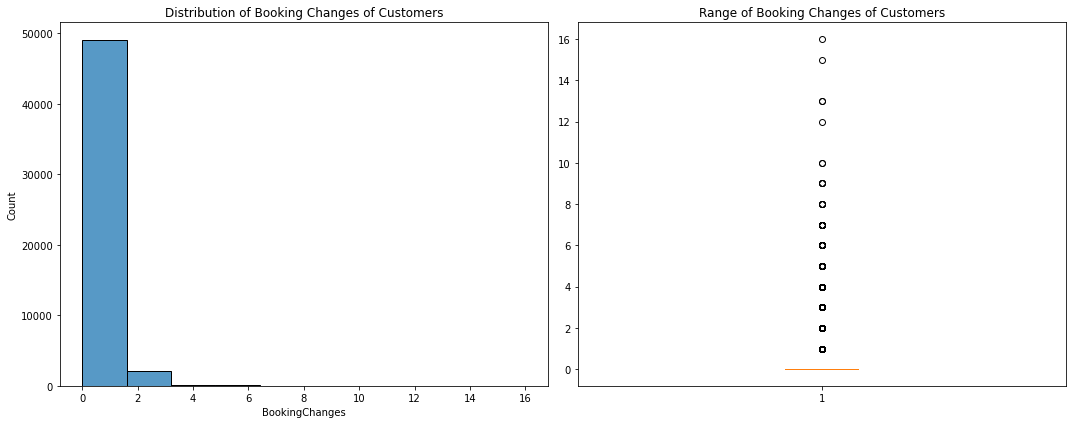

In [266]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['BookingChanges'],bins= 10,ax=axes[0])  


plt.boxplot(df['BookingChanges'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Booking Changes of Customers')
axes[1].set_title('Range of Booking Changes of Customers')
plt.tight_layout()
#plt.savefig("hist of BookingChanges.png" )
plt.show()

It demonstrates that 87 percent of customers do not require any adjustments to their reservations, while only 13 percent do.

In the above boxplot, Q1 = Q3 = median = 0

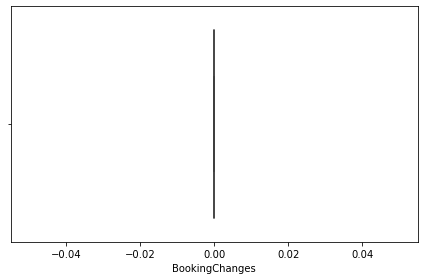

In [267]:
# Calculating Q1 for BookingChanges attribute
Q1_BookingChanges= df.BookingChanges.quantile(0.25)
# Calculating Q3 for BookingChanges attribute
Q3_BookingChanges = df.BookingChanges.quantile(0.75)
# Calculating IQR for BookingChanges attribute
IQR_BookingChanges = Q3_BookingChanges - Q1_BookingChanges
# Calculating lower bound  for Babies attribute
upperBound_BookingChanges = Q3_BookingChanges + (1.5 * IQR_BookingChanges)

# removing the outlier 
index=df['BookingChanges'][(df['BookingChanges']>upperBound_BookingChanges)].index
df.drop(index,inplace=True)

# Visualizing distribution of BookingChanges attribute
sb.boxplot(x = 'BookingChanges', data = df)
plt.tight_layout()
#plt.savefig("boxplot of BookingChanges.png" )
plt.show()

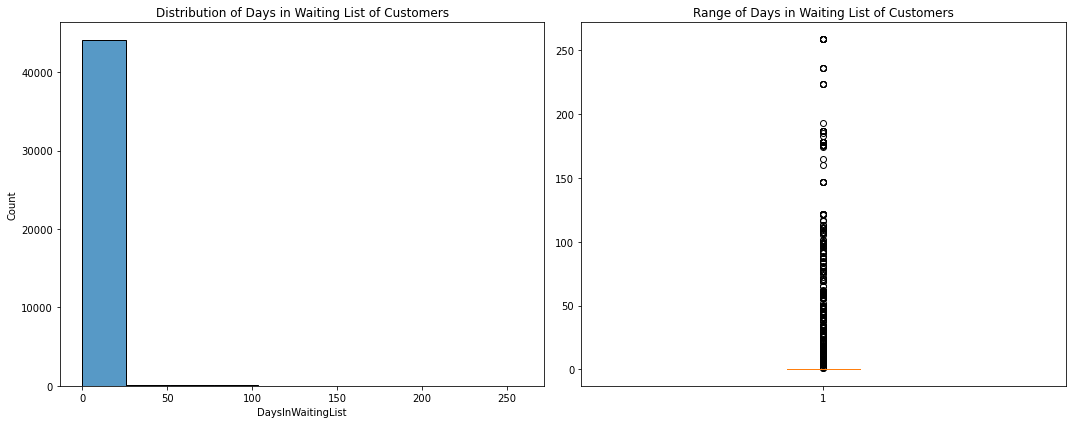

In [268]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['DaysInWaitingList'],bins=10,ax=axes[0])  


plt.boxplot(df['DaysInWaitingList'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Days in Waiting List of Customers')
axes[1].set_title('Range of Days in Waiting List of Customers')
plt.tight_layout()
#plt.savefig("hist of DaysInWaitingList.png" )
plt.show()

It indicates that almost all bookers do not require any days of waiting, with only 0.7 percent requiring one or more days on the waiting list.

In the above boxplot, Q1 = Q3 = median = 0

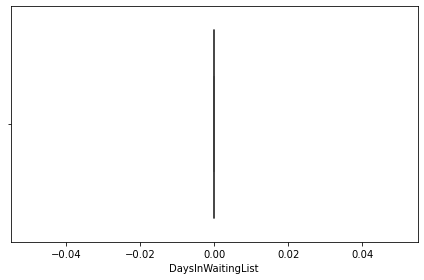

In [269]:
# Calculating Q1 for DaysInWaitingList attribute
Q1_DaysInWaitingList = df.DaysInWaitingList.quantile(0.25)
# Calculating Q3 for ADR attribute
Q3_DaysInWaitingList = df.DaysInWaitingList.quantile(0.75)
# Calculating IQR for ADR attribute
IQR_DaysInWaitingList = Q3_DaysInWaitingList - Q1_DaysInWaitingList
# Calculating lower bound  for ADR attribute
upperBound_DaysInWaitingList = Q3_DaysInWaitingList + (1.5 * IQR_DaysInWaitingList)
# removing the outlier 
index=df['DaysInWaitingList'][(df['DaysInWaitingList']>upperBound_DaysInWaitingList)].index
df.drop(index,inplace=True)
# Visualizing distribution of ADR attribute
sb.boxplot(x = 'DaysInWaitingList', data = df)
plt.tight_layout()
#plt.savefig("boxplot of DaysInWaitingList.png" )
plt.show()

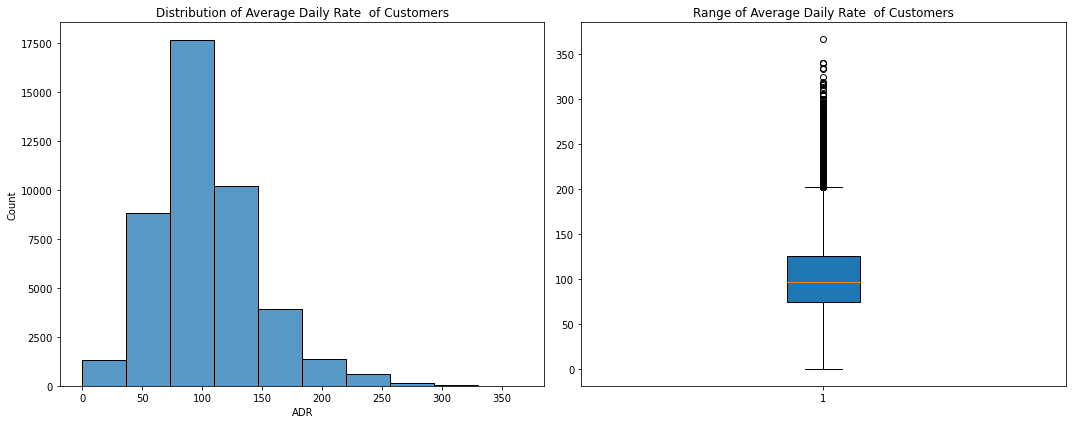

In [270]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['ADR'],bins=10,ax=axes[0])  


plt.boxplot(df['ADR'],patch_artist=True)
axes[0].set_title('Distribution of Average Daily Rate  of Customers')
axes[1].set_title('Range of Average Daily Rate  of Customers')
plt.tight_layout()
#plt.savefig("hist of ADR.png" )
plt.show()


It reveals that the range of 0 to 50 accounts for 8% of the Average Daily Rate, while the range of 50 to 100 accounts for around 46% of the Average Daily Rate.

Q1: $ 75.0 per day on average
Q3: $ 126.0 per day on average


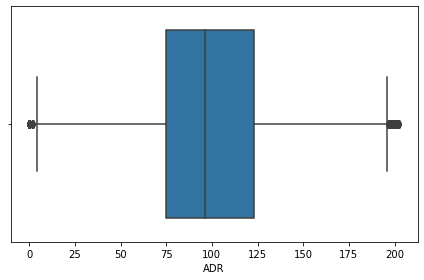

In [271]:
# Calculating Q1 for ADR attribute
Q1 = df.ADR.quantile(0.25)
print("Q1:","$",Q1,"per day on average")
# Calculating Q3 for ADR attribute
Q3 = df.ADR.quantile(0.75)
print("Q3:","$",Q3,"per day on average")
# Calculating IQR for ADR attribute
IQR_ADR = Q3 - Q1
# Calculating lower bound  for ADR attribute
upperBound_ADR = Q3 + (1.5 * IQR_ADR)
# removing the outlier 
index=df['ADR'][(df['ADR']>upperBound_ADR)].index
df.drop(index,inplace=True)

# Visualizing distribution of ADR attribute
sb.boxplot(x = 'ADR', data = df)
plt.tight_layout()
#plt.savefig("boxplot of ADR.png" )
plt.show()

According to the boxplot, 25% of customers spend less than 75 per day on average, and 25 percent spend more than 126 per day on average.

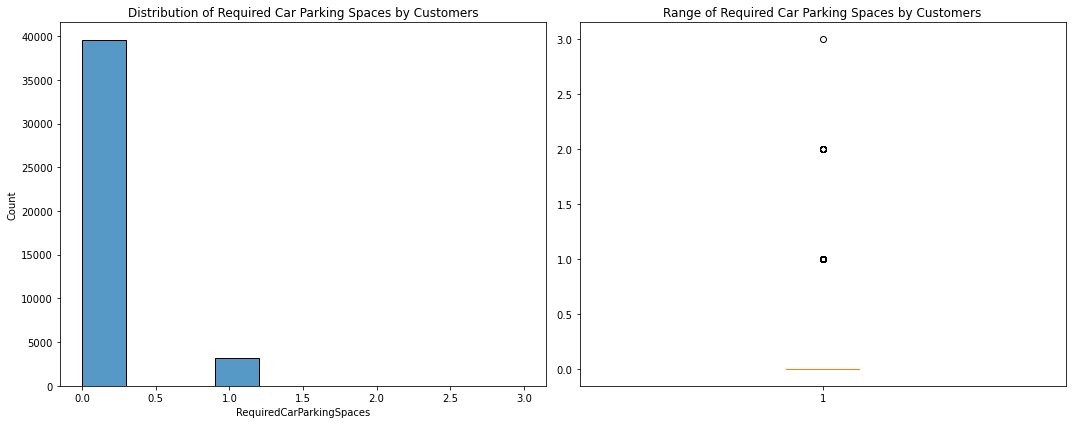

In [272]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['RequiredCarParkingSpaces'],bins= 10, ax=axes[0])  


plt.boxplot(df['RequiredCarParkingSpaces'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Required Car Parking Spaces by Customers')
axes[1].set_title('Range of Required Car Parking Spaces by Customers')
plt.tight_layout()
#plt.savefig("hist of RequiredCarParkingSpaces.png" )
plt.show()

It demonstrates that around 95% of bookers do not have a specific auto parking space demand, whereas approximately 7% do.

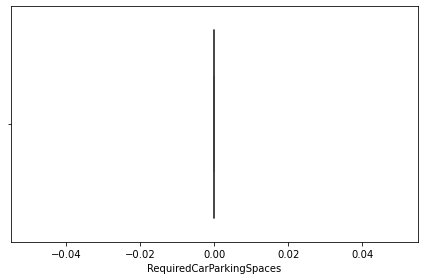

In [273]:
# Calculating Q1 for RequiredCarParkingSpaces attribute
Q1_RequiredCarParkingSpaces = df.RequiredCarParkingSpaces.quantile(0.25)
# Calculating Q3 for RequiredCarParkingSpaces attribute
Q3_RequiredCarParkingSpaces = df.RequiredCarParkingSpaces.quantile(0.75)
# Calculating IQR for RequiredCarParkingSpaces attribute
IQR_RequiredCarParkingSpaces = Q3_RequiredCarParkingSpaces - Q1_RequiredCarParkingSpaces
# Calculating lower bound  for RequiredCarParkingSpaces attribute
upperBound_RequiredCarParkingSpaces = Q3_RequiredCarParkingSpaces + (1.5 * IQR_RequiredCarParkingSpaces)
# Replacing outliers which have values larger than upperbound with Q3 
df['RequiredCarParkingSpaces'] = np.where(df["RequiredCarParkingSpaces"] > upperBound_RequiredCarParkingSpaces, Q3_RequiredCarParkingSpaces ,df['RequiredCarParkingSpaces'])
# Visualizing distribution of RequiredCarParkingSpaces attribute
sb.boxplot(x = 'RequiredCarParkingSpaces', data = df)
plt.tight_layout()
#plt.savefig("boxplot of RequiredCarParkingSpaces.png" )
plt.show()

A straight line can be seen in the boxplot above. it means Q1 = Q3 = median = 0

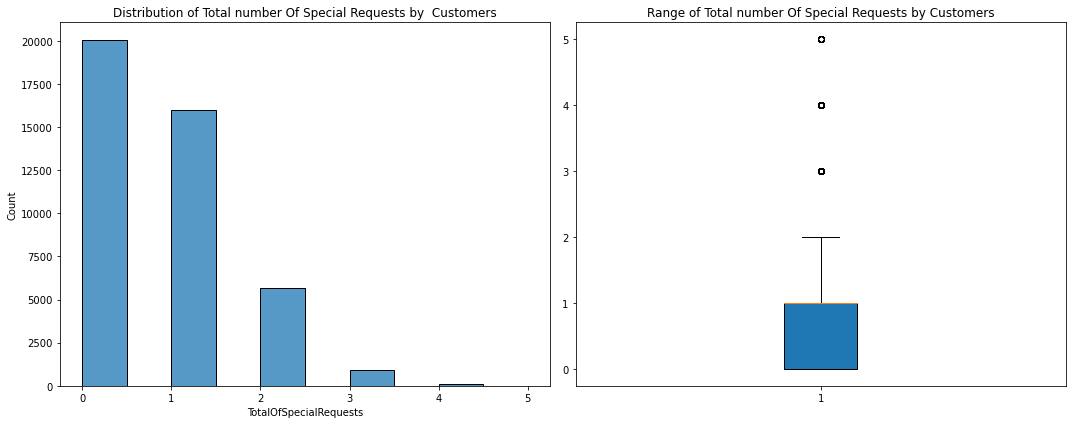

In [274]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

sb.histplot(df['TotalOfSpecialRequests'],bins= 10,ax=axes[0])  


plt.boxplot(df['TotalOfSpecialRequests'],patch_artist=True)## Whiskers in the Boxplot shows that there are outliers 
axes[0].set_title('Distribution of Total number Of Special Requests by  Customers')
axes[1].set_title('Range of Total number Of Special Requests by Customers')
plt.tight_layout()
#plt.savefig("hist of TotalOfSpecialRequests.png" )
plt.show()

It demonstrates that approximately 47 percent of bookers have no explicit request, whereas approximately 37 percent have one unique request .

Q1: 0 SpecialRequests
Q3: 1 SpecialRequests


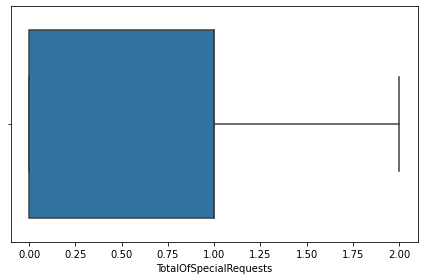

In [275]:
# Calculating Q1 for TotalOfSpecialRequests attribute
Q1 = df.TotalOfSpecialRequests.quantile(0.25)
print("Q1:",int(Q1),"SpecialRequests")
# Calculating Q3 for TotalOfSpecialRequests attribute
Q3 = df.TotalOfSpecialRequests.quantile(0.75)
print("Q3:",int(Q3),"SpecialRequests")
# Calculating IQR for TotalOfSpecialRequests attribute
IQR_TotalOfSpecialRequests = Q3 - Q1
# Calculating lower bound  for TotalOfSpecialRequests attribute
upperBound_TotalOfSpecialRequests = Q3 + (1.5 * IQR_TotalOfSpecialRequests)
# Replacing outliers which have values larger than upperbound with Q3 
df['TotalOfSpecialRequests'] = np.where(df["TotalOfSpecialRequests"] > upperBound_TotalOfSpecialRequests, Q3 ,df['TotalOfSpecialRequests'])
# Visualizing distribution of TotalOfSpecialRequests attribute
sb.boxplot(x = 'TotalOfSpecialRequests', data = df)
plt.tight_layout()
#plt.savefig("boxplot of TotalOfSpecialRequests.png" )
plt.show()

According to the boxplot, 25% of customers do not require any special requests, whereas 25% of customers require more than one special request.

# Check whether the provided array or dtype is of a numeric dtype.

In [276]:
numeric = []
category = []
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric.append(col)
    else:
         category.append(col)
print("category :",category)   

category : ['IsCanceled', 'ArrivalDateYear', 'ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'CustomerType', 'ReservationStatus', 'ReservationStatusDate', 'Hotal']


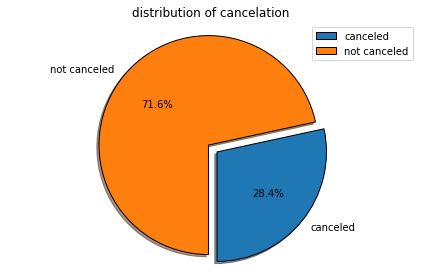

In [277]:
# Plotting pie chart for percentage of IsCanceled attribute
countcanceled = df.IsCanceled[df["IsCanceled"]==1].count()
countnotcanceled = df.IsCanceled[df['IsCanceled']==0].count()

labels = ['canceled', 'not canceled']
slices = [countcanceled, countnotcanceled]
explode = [0, 0.1]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= -90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of cancelation ")
plt.legend()
plt.tight_layout() #Used for default padding
plt.savefig('distribution of cancelation.jpg')
plt.show()

From the above pie chart,I can see the percentage of the hotel reservation was canceled (1) or not (0).  I observed that 28.4 percent of the hotel reservation had been cancelled.

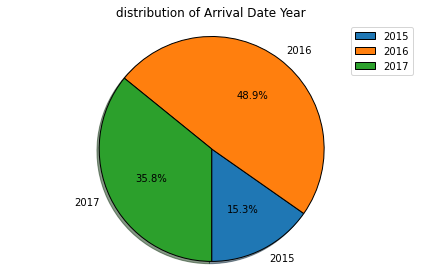

In [278]:
# Plotting pie chart for percentage of ArrivalDateYear attribute
count_2015 = df.IsCanceled[df["ArrivalDateYear"]==2015].count()
count_2016 = df.IsCanceled[df['ArrivalDateYear']==2016].count()
count_2017 = df.IsCanceled[df['ArrivalDateYear']==2017].count()

labels = ['2015', '2016',2017]
slices = [count_2015, count_2016,count_2017]
explode = [0, 0,0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= -90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of Arrival Date Year ")
plt.legend()
plt.tight_layout() #Used for default padding
plt.savefig('distribution of Arrival Date Year.jpg')
plt.show()

From the above pie chart,I noted that 15.3% of the custumber arrived in 2015, 48.9 percent in 2016, and 35.8 percent in 2017.

# What is the busiest month at the hotel?

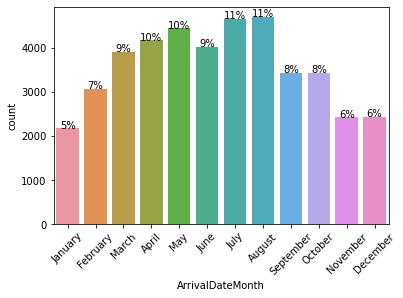

In [279]:
total = float(len(df))
for col in ['ArrivalDateMonth']:
    chart = sb.countplot(df[col],order=["January","February","March","April","May","June","July","August","September","October","November","December"])# frequency distribution
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    for p in chart.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+ 2
        chart.annotate(percentage, (x, y),ha='center')
    plt.show()      

According to the graph above, the busiest times in hotels are during the summer months of July and August.

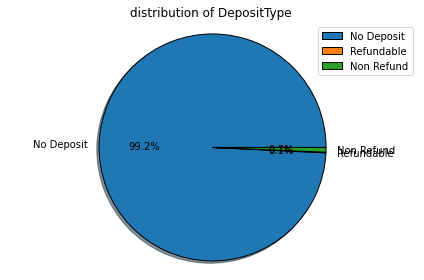

In [280]:
# Plotting pie chart for distribution of DepositType
count_No_Deposit = df.DepositType[df["DepositType"].str.strip()=="No Deposit"].count()
count_Refundablet = df.DepositType[df['DepositType'].str.strip()=="Refundable"].count()
count_Non_Refund = df.DepositType[df['DepositType'].str.strip()=="Non Refund"].count()
labels = ['No Deposit', 'Refundable','Non Refund']
slices = [count_No_Deposit, count_Refundablet,count_Non_Refund]
explode = [0, 0,0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= 0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of DepositType ")
plt.legend()
plt.tight_layout() #Used for default padding
# plt.savefig('distribution of DepositType.jpg')
plt.show()

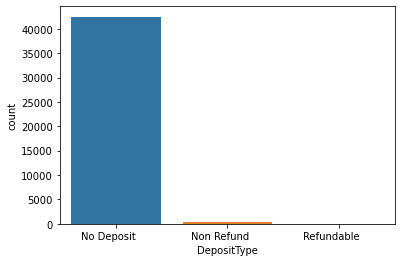

In [281]:
chart = sb.countplot(df["DepositType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("barchat of DepositType.png" )
plt.show()

From the above chart,I noticed that the deposit type for 99 percent of consumers was No Deposit.

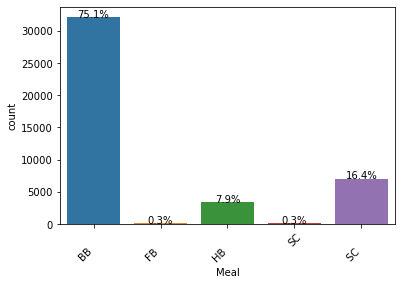

In [282]:
for col in ['Meal']:
    chart = sb.countplot(df[col]) # frequency distribution
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    for p in chart.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+ 2
        chart.annotate(percentage, (x, y),ha='center')
    plt.show()   

From the above chart,I noted that the most common meal type for consumers (75.1%) was Bed & Breakfast.

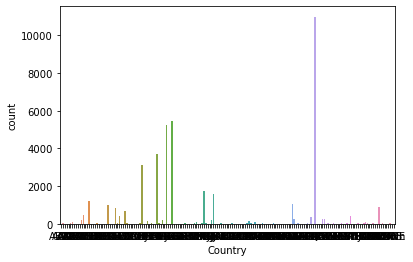

In [283]:

chart = sb.countplot(df["Country"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Country.png" )
plt.show()

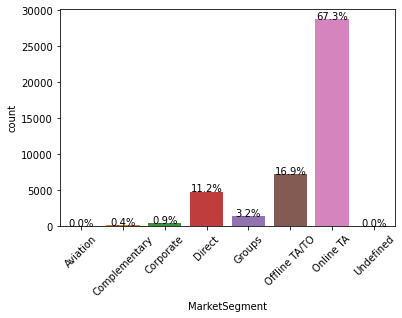

In [284]:
for col in ['MarketSegment']:
    chart = sb.countplot(df[col]) # frequency distribution
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    for p in chart.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+ 2
        chart.annotate(percentage, (x, y),ha='center')
    plt.show()

From the above chart, The most prevalent Market Segment identification for consumers (67.3%) was online Travel Agents.

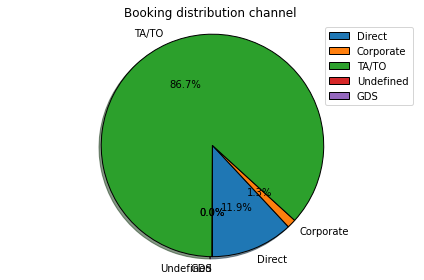

In [285]:
# Plotting pie chart for percentage of ArrivalDateYear attribute
count_Direct= df.DistributionChannel[df["DistributionChannel"]=="Direct"].count()
count_Corporate = df.DistributionChannel[df['DistributionChannel']=="Corporate"].count()
count_TA = df.DistributionChannel[df['DistributionChannel']=="TA/TO"].count()
count_Undefined = df.DistributionChannel[df['DistributionChannel']=="Undefined"].count()
count_GDS = df.DistributionChannel[df['DistributionChannel']=="GDS"].count()
labels = ['Direct', 'Corporate','TA/TO','Undefined','GDS']
slices = [count_Direct, count_Corporate,count_TA,count_Undefined,count_GDS]
explode = [0, 0,0,0,0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= -90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Booking distribution channel ")
plt.legend()
plt.tight_layout() #Used for default padding
#plt.savefig('distribution of Arrival Date Year.jpg')
plt.show()

From the above pie chart, I can see the percentage of the Booking distribution channel .
I noted that 86.7% of customers used Travel Agents or Tour Operators to book their hotel reservations.

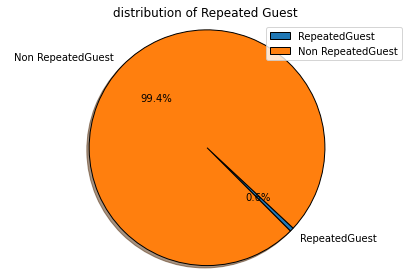

In [286]:
# Plotting pie chart for distribution of Repeated Guest
count_RepeatedGuest = df.IsRepeatedGuest[df["IsRepeatedGuest"]==1].count()
count_nonRepeatedGuest = df.IsRepeatedGuest[df['IsRepeatedGuest']==0].count()

labels = ['RepeatedGuest', 'Non RepeatedGuest']
slices = [count_RepeatedGuest, count_nonRepeatedGuest]
explode = [0, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= -45, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of Repeated Guest ")
plt.legend()
plt.tight_layout() #Used for default padding
# plt.savefig('distribution of cancelation.jpg')
plt.show()

The percentage distribution of Repeated Guests may be seen in the pie chart above. I noted that only 0.8 percent of the custumber was repeated.

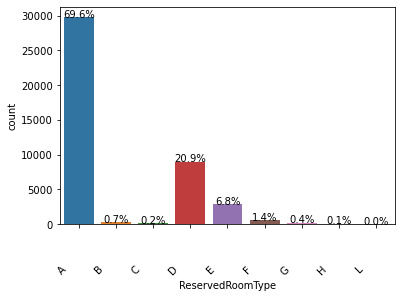

In [287]:
for col in ['ReservedRoomType']:
    chart = sb.countplot(df[col]) # frequency distribution
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    for p in chart.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+ 2
        chart.annotate(percentage, (x, y),ha='center')
    plt.show()

According to the graph above, the most common Reserved Room Type for consumers was A, which accounted for about 69.6 percent of all reservations.

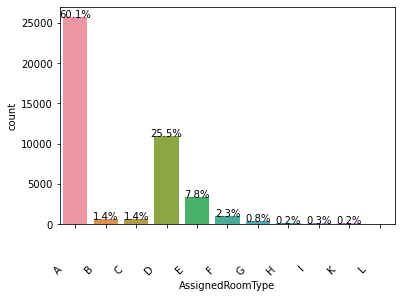

In [288]:
for col in ['AssignedRoomType']:
    chart = sb.countplot(df[col]) # frequency distribution
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    for p in chart.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+ 2
        chart.annotate(percentage, (x, y),ha='center')
    plt.show()

Consumers preferred the Assigned Room Type A, which accounted for 60.1 percent of all reservations, as shown in the graph above.

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42791 entries, 4 to 87228
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IsCanceled                   42791 non-null  category      
 1   LeadTime                     42791 non-null  int64         
 2   ArrivalDateYear              42791 non-null  category      
 3   ArrivalDateMonth             42791 non-null  category      
 4   ArrivalDateWeekNumber        42791 non-null  int64         
 5   ArrivalDateDayOfMonth        42791 non-null  int64         
 6   StaysInWeekendNights         42791 non-null  int64         
 7   StaysInWeekNights            42791 non-null  int64         
 8   Adults                       42791 non-null  int64         
 9   Children                     42791 non-null  int64         
 10  Babies                       42791 non-null  int64         
 11  Meal                         42791 non-nu

In [290]:

df[df['DepositType'].str.strip()=='No Deposit']

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotal
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240.0,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03,resort hotal
5,0,0,2015,July,27,1,0,2,2,0,...,No Deposit,0.0,0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03,resort hotal
6,0,9,2015,July,27,1,0,2,2,0,...,No Deposit,303.0,0,Transient,103.00,0.0,1.0,Check-Out,2015-07-03,resort hotal
7,1,85,2015,July,27,1,0,3,2,0,...,No Deposit,240.0,0,Transient,82.00,0.0,1.0,Canceled,2015-05-06,resort hotal
8,1,75,2015,July,27,1,0,3,2,0,...,No Deposit,15.0,0,Transient,105.50,0.0,0.0,Canceled,2015-04-22,resort hotal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87223,0,164,2017,August,35,31,2,4,2,0,...,No Deposit,42.0,0,Transient,87.60,0.0,0.0,Check-Out,2017-09-06,city hotal
87224,0,21,2017,August,35,30,2,5,2,0,...,No Deposit,394.0,0,Transient,96.14,0.0,2.0,Check-Out,2017-09-06,city hotal
87225,0,23,2017,August,35,30,2,5,2,0,...,No Deposit,394.0,0,Transient,96.14,0.0,0.0,Check-Out,2017-09-06,city hotal
87227,0,34,2017,August,35,31,2,5,2,0,...,No Deposit,9.0,0,Transient,157.71,0.0,1.0,Check-Out,2017-09-07,city hotal


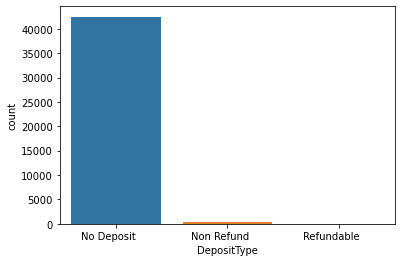

In [291]:
chart = sb.countplot(df["DepositType"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of DepositType.png" )
plt.show()

According to the graph above, the most common Deposit Type for consumers was No Deposit.

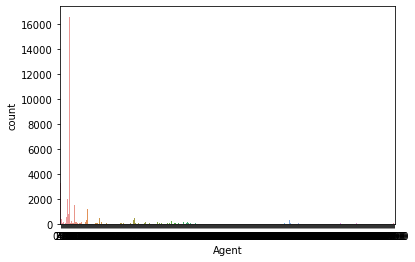

In [292]:
chart = sb.countplot(df["Agent"]) # frequency distribution 
chart.set_xticklabels(chart.get_xticklabels())
#plt.savefig("hist of Agent.png" )
plt.show()

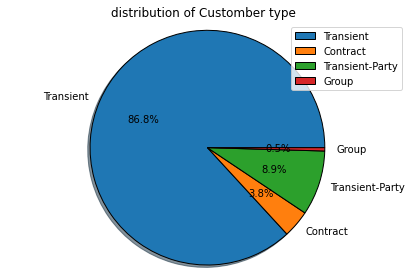

In [293]:
# Plotting pie chart for distribution of CustomerType
count_Transient = df.CustomerType[df["CustomerType"]=="Transient"].count()
count_Contract = df.CustomerType[df['CustomerType']=="Contract"].count()
count_Transient_Party = df.CustomerType[df['CustomerType']=="Transient-Party"].count()
count_Group = df.CustomerType[df['CustomerType']=="Group"].count()
labels = ['Transient', 'Contract','Transient-Party','Group']
slices = [count_Transient, count_Contract,count_Transient_Party,count_Group]
explode = [0, 0,0,0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= 0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of Customber type  ")
plt.legend()
plt.tight_layout() #Used for default padding
# plt.savefig('distribution of cancelation.jpg')
plt.show()

From the above pie chart, I can see the percentage of distribution of Booking type of the customer.
I noticed that mostly(86.8.4%)customer's was in Transient and very few customer in Group .

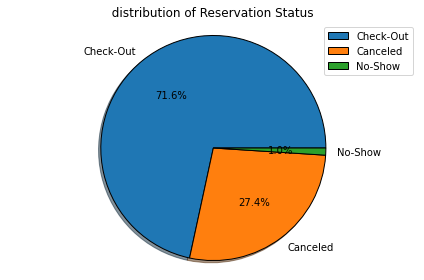

In [294]:
# Plotting pie chart for distribution of Reservation Status
count_Check_Out = df.CustomerType[df["ReservationStatus"]=="Check-Out"].count()
count_Canceled = df.CustomerType[df['ReservationStatus']=="Canceled"].count()
count_No_Show = df.CustomerType[df['ReservationStatus']=="No-Show"].count()
labels = ['Check-Out', 'Canceled','No-Show']
slices = [count_Check_Out, count_Canceled,count_No_Show]
explode = [0, 0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= 0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("  distribution of Reservation Status  ")
plt.legend()
plt.tight_layout() #Used for default padding
# plt.savefig('distribution of cancelation.jpg')
plt.show()

From the above pie chart, I can see the percentage of distribution of Reservation Status.
I noticed that mostly(72.5%) of customer's  Reservation Status  was in Check-Out and very few (1.2%) customer Reservation Status was NO-Show.

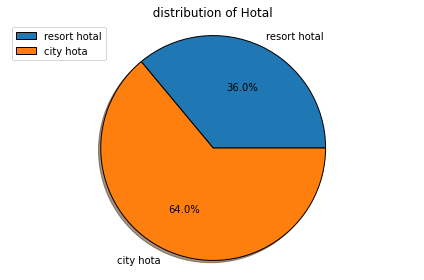

In [295]:
# Plotting pie chart for distribution of Hotal
count_resort = df.Hotal[df["Hotal"]=="resort hotal"].count()
count_city = df.Hotal[df['Hotal']=="city hotal"].count()
labels = ['resort hotal', 'city hota']
slices = [count_resort, count_city]
explode = [0, 0]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle= 0, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("  distribution of Hotal  ")
plt.legend()
plt.tight_layout() #Used for default padding
# plt.savefig('distribution of Hotal.jpg')
plt.show()

The percentage of distribution of Hotal Reservation may be seen in the pie chart above. I discovered that the majority of customers (61.1%) chose city hotels, while the remaining customers favour resort hotels.

# What percentage of hotel reservations are cancelled?

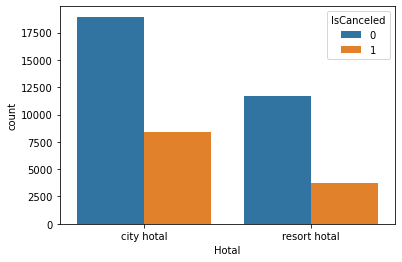

In [296]:
sb.countplot(x='Hotal', hue = 'IsCanceled',data = df)
plt.show()

If I look at the cancellation status of booking transactions based on the hotel type, I find that "City Hotel" have more cancellations compared to the "Resort Hotel" i.e. approximately 30% vs 21%.

# What is the share of  hotel booking  cancelation by customer type ?

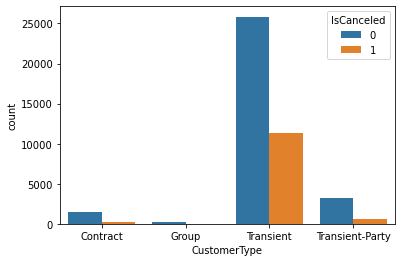

In [297]:
sb.countplot(x='CustomerType', hue = 'IsCanceled',data = df)
plt.show()

The above graphic depicts that most of the hotel booking cancellations were done by customers who fall in the "Transient" category.    

# Which month is the highest cancellation?

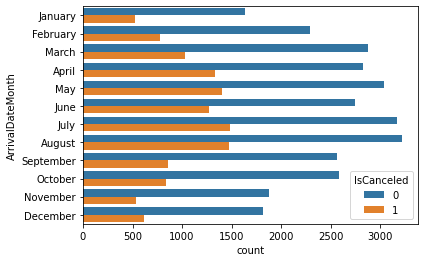

In [298]:
sb.countplot(y='ArrivalDateMonth', order=["January","February","March","April","May","June","July","August","September","October","November","December"],hue = 'IsCanceled',data = df)
plt.show()

The above graphic represents that summer months of July and August saw the maximum hotel booking cancellations compared to other months. However, these two months accounted for almost 25% of the total reservations.

# Variance of the attribute

In [299]:
variance = df.var()
variance
#variance.to_csv("variance.csv",index=True)

IsCanceled                         0.203302
LeadTime                        5048.306985
ArrivalDateYear                    0.468794
ArrivalDateWeekNumber            186.849528
ArrivalDateDayOfMonth             78.652708
StaysInWeekendNights               0.781850
StaysInWeekNights                  2.233152
Adults                             0.000000
Children                           0.000000
Babies                             0.000000
IsRepeatedGuest                    0.005485
PreviousCancellations              0.000000
PreviousBookingsNotCanceled        0.000000
BookingChanges                     0.000000
Agent                          11769.808920
DaysInWaitingList                  0.000000
ADR                             1392.089779
RequiredCarParkingSpaces           0.000000
TotalOfSpecialRequests             0.488795
dtype: float64

I delete attributes with nearly zero variance from the data set because they don't provide any information about the data set.

In [300]:
# delete attributes with nearly zero variance from the data set
df = df.drop(['IsRepeatedGuest','DaysInWaitingList','RequiredCarParkingSpaces','Babies','Adults','Children','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges'], axis=1)

# Pearson Correlation

In [301]:
corr =df.corr().round(2)
corr
corr.to_csv("corr2.csv",index=True)

# Correlation matrix using Pearson method

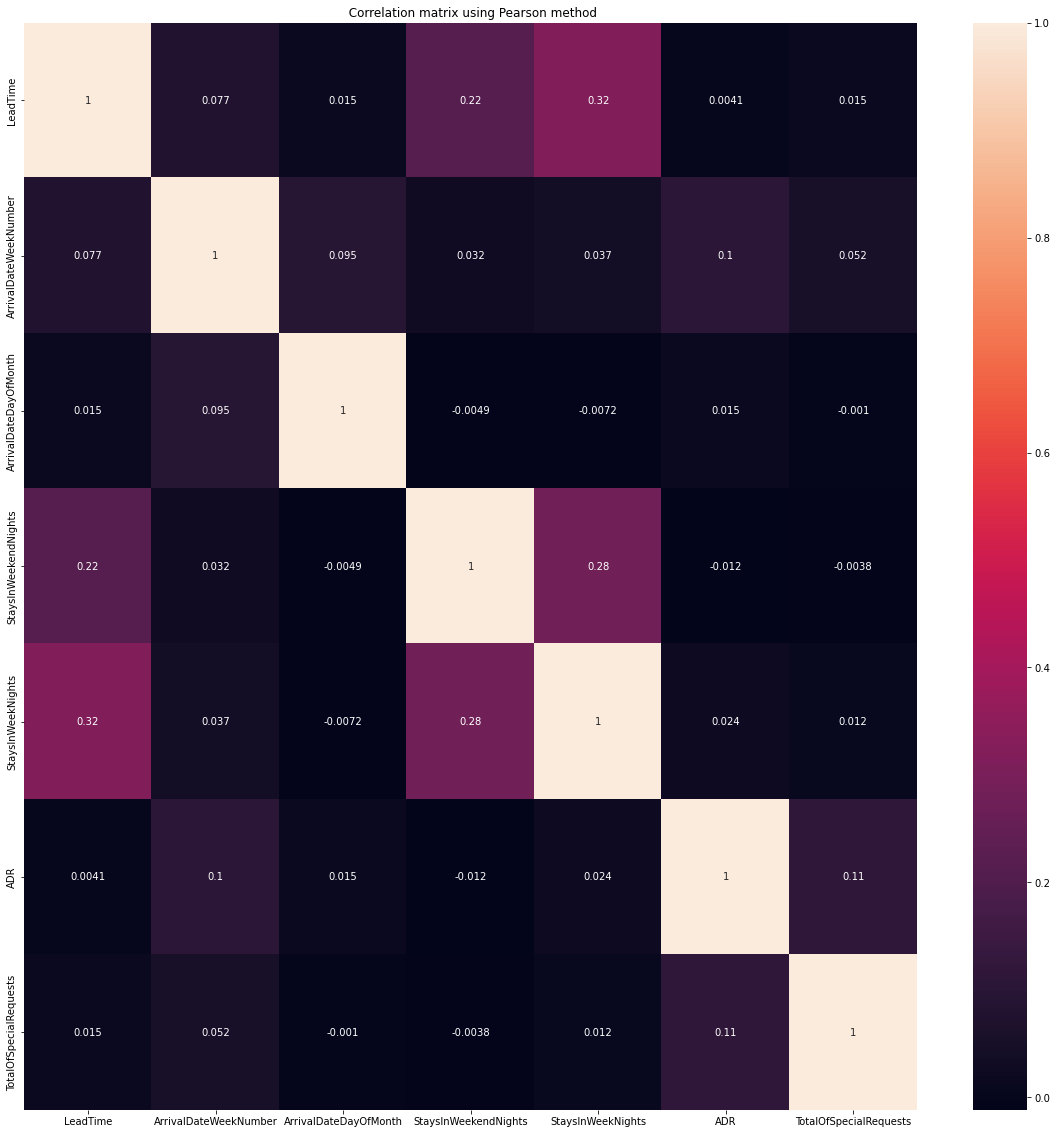

In [302]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(), annot=True)
plt.title("  Correlation matrix using Pearson method ")
#plt.savefig("corr.png",bbox_inches='tight' )
plt.show()

# Spearman Correlation

In [303]:
corr1 =df.corr(method='spearman').round(2)
corr1

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,ADR,TotalOfSpecialRequests
LeadTime,1.00,0.07,0.01,0.25,0.37,0.03,0.02
ArrivalDateWeekNumber,0.07,1.00,0.09,0.03,0.04,0.13,0.05
ArrivalDateDayOfMonth,0.01,0.09,1.00,-0.00,-0.01,0.01,-0.00
StaysInWeekendNights,0.25,0.03,-0.00,1.00,0.22,-0.03,-0.00
StaysInWeekNights,0.37,0.04,-0.01,0.22,1.00,0.01,0.02
ADR,0.03,0.13,0.01,-0.03,0.01,1.00,0.12
TotalOfSpecialRequests,0.02,0.05,-0.00,-0.00,0.02,0.12,1.00


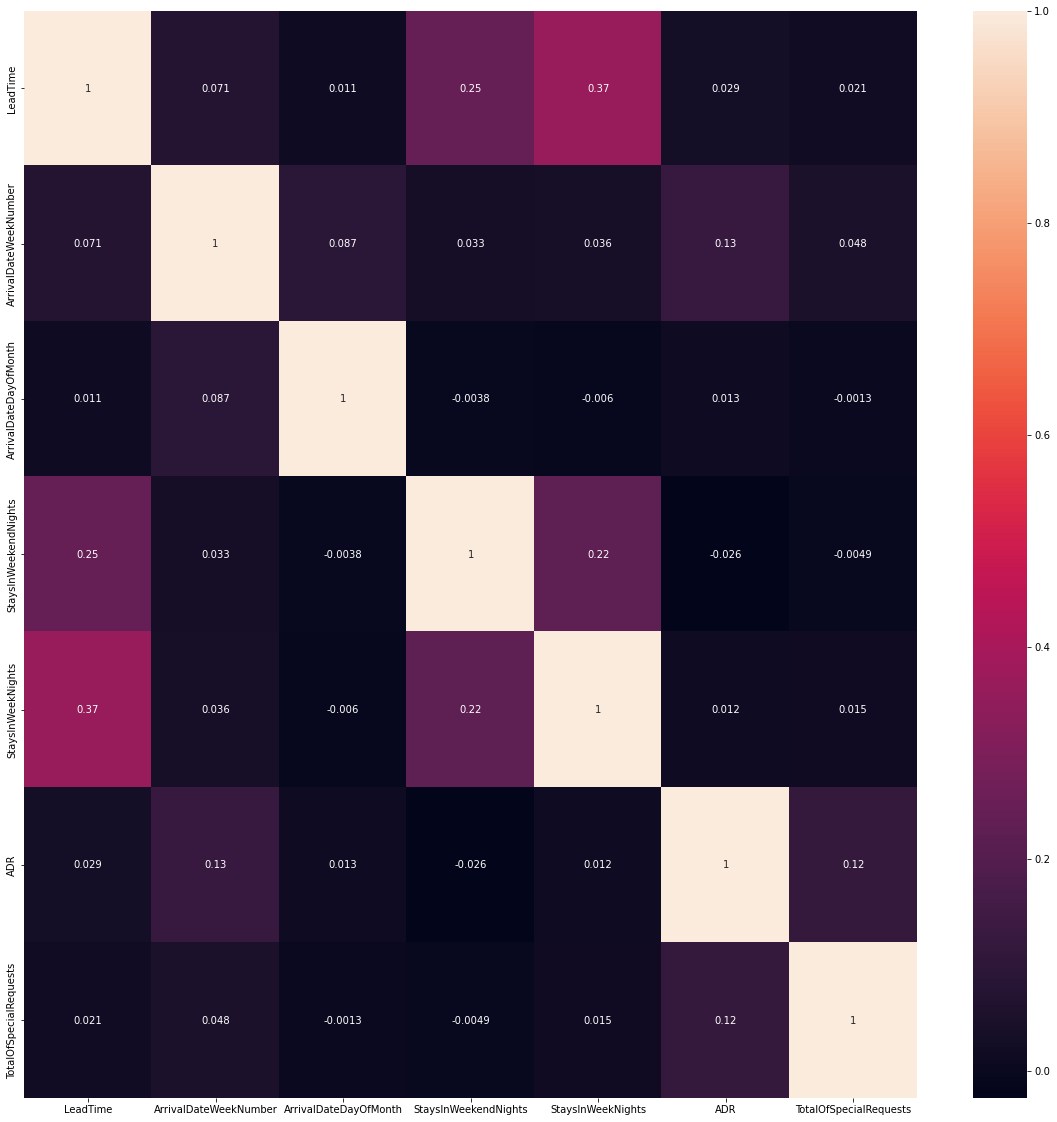

In [304]:
plt.figure(figsize=(20,20))
sb.heatmap(df.corr(method='spearman'), annot=True)
#plt.savefig("corr.png",bbox_inches='tight' )
plt.show()

 The above graphic depicts that the relation between two variables using two different methods and shows how the change in one variable impact other. The value varies between -1 to 1. No strong correlation has been observed between any of the variables. 

In [305]:
df.columns[~df.columns.isin(category)]

Index(['LeadTime', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'ADR',
       'TotalOfSpecialRequests'],
      dtype='object')

In [306]:
# Choosing features for our model
dfX = df[df.columns[~df.columns.isin(category)]]
dfX

,LeadTime,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,ADR,TotalOfSpecialRequests
4,14,27,1,0,2,98.00,1.0
5,0,27,1,0,2,107.00,0.0
6,9,27,1,0,2,103.00,1.0
7,85,27,1,0,3,82.00,1.0
8,75,27,1,0,3,105.50,0.0
...,...,...,...,...,...,...,...
87223,164,35,31,2,4,87.60,0.0
87224,21,35,30,2,5,96.14,2.0
87225,23,35,30,2,5,96.14,0.0
87227,34,35,31,2,5,157.71,1.0


In [307]:
# convert the target variable into numeric
df["IsCanceled"] = df["IsCanceled"].astype(int) 

# Which attributes appear to be the most closely associated with the target attribute('is cancelled')?

In [308]:
df.corr()['IsCanceled'].abs().sort_values(ascending = False)
corr.to_csv("corr2.csv",index=True)

it show that Reservation attribute appear to be the most closely associated with the target attribute

# Normalize the data set using Min-Max Scaling: 

In [312]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [313]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dfX),columns=dfX.columns)

In [ ]:
# Checking the target variable is balanced or not

In [314]:
dfY = pd.Series(df["IsCanceled"])
dfY.value_counts()

0    30643
1    12148
Name: IsCanceled, dtype: int64

It demonstrates that the desired attribute is unbalanced.

# SMOTE - Synthetic Minority Oversampling Technique

In [315]:
!pip install imblearn

In [316]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [317]:
scaled_df, dfY = oversample.fit_resample(scaled_df,dfY)
dfY = pd.Series(dfY)
dfY.value_counts()

1    30643
0    30643
Name: IsCanceled, dtype: int64

# Cross validation:

Train and Test Split approach :

In this method, the entire data set is randomly partitioned into training and test sets. I divided the information into two parts (training and test sets). The Training set contains 80% of the records in the data set, whereas the Test set contains 20% of the data set's observations.


In [318]:
from sklearn.model_selection import train_test_split

In [319]:
# Divide the dataset to training and test sets.
X_train, X_test, y_train, y_test = train_test_split(scaled_df,dfY, test_size=0.2,random_state=3)


Modeling with KNN algorithm

In [320]:
# The K-NN algorithm can be used for both classification and regression,
#but it is more commonly employed for classification.
#The K-Nearest Neighbour algorithm is based on the Supervised Learning technique
# it is one of the simplest Machine Learning algorithms.
#The K-NN method thinks that the new case/data and existing cases are comparable,
# and it places the new case in the category that is closest to the existing categories.

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble  import RandomForestClassifier 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [322]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_k=knn.predict(X_test)
knn_acc = accuracy_score(y_test,pred_k)*100
print("accuracy of KNN :", knn_acc)

accuracy of KNN : 73.47854462391908


Modeling with Logistic Regression

In [323]:
model=LogisticRegression()
model.fit(X_train,y_train)
predict_logistic=model.predict(X_test)
cf_matrix_logistic = confusion_matrix(y_test,predict_logistic)
logistic_acc = accuracy_score(y_test,predict_logistic)*100
print("accuracy of Logistic Regression :", logistic_acc)

accuracy of Logistic Regression : 61.926904878446734


Modeling with Gaussian Naive Bayes classifier

In [324]:
# instantiate the model
model = GaussianNB()
# fit the model
gnb=model.fit(X_train, y_train)
gnb_predict=gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,gnb_predict)*100
print("accuracy of Gaussian Naive Bayes :", gnb_acc)

accuracy of Gaussian Naive Bayes : 60.833741230217


Modeling with RandomForestClassifier

In [325]:
model=RandomForestClassifier(n_estimators=20)
RFC=model.fit(X_train,y_train)
RFC_predicted=RFC.predict(X_test) 
RFC_acc = accuracy_score(y_test,RFC_predicted)*100
print("accuracy of Random Forest :", RFC_acc)

accuracy of Random Forest : 79.37673356175559


# Comparing Accuracies

In [329]:
labels = [ "KNN" , "Logistic Regression" , "Naive Bayes","Random Forest"]
x = [knn_acc , logistic_acc ,gnb_acc,RFC_acc]
eval_frame = pd.DataFrame()
eval_frame['Model'] = labels
eval_frame['train_test_split'] = x
eval_frame

,Model,train_test_split
0,KNN,73.478545
1,Logistic Regression,61.926905
2,Naive Bayes,60.833741
3,Random Forest,79.376734


K-Folds Cross Validation:

The K-Folds method is used to minimize the bias of the model. Because each data record has a chance to appear in both the training and test data sets. The K-Folds method Divide the dataset into k-folds in a sequence. At random, I divided the data into five folds. The four folds are then used to fit the model, and the fifth fold is used to test it. Repeat until each fold has been used as a test set. Then add together all the results and calculate the average. That will be the model's metric of success.

In [330]:
from sklearn.model_selection import KFold

In [331]:
kfold = KFold(n_splits=5)

In [332]:
# Modeling step Test differents algorithms 
classifiers1 = []

In [333]:
classifiers1.append(KNeighborsClassifier())
classifiers1.append(LogisticRegression())
classifiers1.append(GaussianNB())
classifiers1.append(RandomForestClassifier())

In [334]:
from sklearn.model_selection import cross_val_score

In [335]:
accuracy_results1 = []
for a in classifiers1 :
    accuracy_results1.append(cross_val_score(a, X_train,y_train, scoring = "accuracy", cv = kfold))


In [336]:
accuracy_results1

[array([0.71456251, 0.71486845, 0.71446053, 0.71239164, 0.71902091]),
 array([0.62237406, 0.62339384, 0.62573934, 0.62315145, 0.63426823]),
 array([0.61564348, 0.61809096, 0.62288395, 0.6172361 , 0.62131566]),
 array([0.78768101, 0.79155619, 0.78747705, 0.790923  , 0.79571647])]

In [337]:
accuracy_means1 = []
for e in accuracy_results1:
    accuracy_means1.append(e.mean()*100)

In [338]:
accuracy_means1

[71.50608079246302, 62.57853848599599, 61.903403124126676, 79.06707452471886]

In [339]:
eval_frame[' kfold_5']=accuracy_means1
eval_frame

,Model,train_test_split,kfold_5
0,KNN,73.478545,71.506081
1,Logistic Regression,61.926905,62.578538
2,Naive Bayes,60.833741,61.903403
3,Random Forest,79.376734,79.067075


In [340]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

Stratified K Fold: 

This cross-validation object returns stratified folds and is a variant of K-Fold. The folds are made by keeping the percentage of samples in each class. I divided the data into five stratified folds. The four folds are then used to fit the model, and the fifth fold is used to test it. Repeat until each fold has been used as a test set. Then add together all the results and calculate the average. That will be the model's metric of success.

In [341]:

Stratifiedkfold = StratifiedKFold(n_splits= 5)

In [342]:
# Modeling step Test differents algorithms 
classifiers_4 = []
classifiers_4.append(KNeighborsClassifier())
classifiers_4.append(LogisticRegression())
classifiers_4.append(GaussianNB())
classifiers_4.append(RandomForestClassifier())
accuracy_results_4 = []
for classifier in classifiers_4 :
    accuracy_results_4.append(cross_val_score(classifier, X_train,y_train, scoring = "accuracy", cv = Stratifiedkfold))
accuracy_means_4 = []
for accuracy_result in accuracy_results_4:
    accuracy_means_4.append(accuracy_result.mean()*100)
accuracy_means_4
eval_frame['Stratifiedkfold_5']=accuracy_means_4
eval_frame

,Model,train_test_split,kfold_5,Stratifiedkfold_5
0,KNN,73.478545,71.506081,71.477532
1,Logistic Regression,61.926905,62.578538,62.617293
2,Naive Bayes,60.833741,61.903403,61.874850
3,Random Forest,79.376734,79.067075,79.113989


Repeated Random Test-Train Splits:

This strategy combines the k-fold cross-validation method with typical train-test splits. I create random divides of the data in the training-test set, similar to the cross-validation approach, and then repeat the process of splitting and testing the algorithm many times. I divided the data into five Repeated Random Test-Train Splits.

In [343]:
from sklearn.model_selection import ShuffleSplit

In [344]:
kfold = ShuffleSplit(n_splits=5,test_size=0.3)
# Modeling step Test differents algorithms 
classifiers_2 = []
classifiers_2.append(KNeighborsClassifier())
classifiers_2.append(LogisticRegression())
classifiers_2.append(GaussianNB())
classifiers_2.append(RandomForestClassifier())
accuracy_results_2 = []
for classifier in classifiers_2 :
    accuracy_results_2.append(cross_val_score(classifier, X_train,y_train, scoring = "accuracy", cv = kfold))
accuracy_means_2 = []
for accuracy_result in accuracy_results_2:
    accuracy_means_2.append(accuracy_result.mean()*100)
accuracy_means_2
eval_frame['RRTestTrainSplits_5']=accuracy_means_2
eval_frame.round(2)

,Model,train_test_split,kfold_5,Stratifiedkfold_5,RRTestTrainSplits_5
0,KNN,73.48,71.51,71.48,70.39
1,Logistic Regression,61.93,62.58,62.62,62.50
2,Naive Bayes,60.83,61.90,61.87,61.97
3,Random Forest,79.38,79.07,79.11,78.55


When I employed a train-test-split cross validation method, the best model was shown as a random forest in the table above.

In [345]:
# Confusion Matrix corresponding to Random Forest Classifier model

In [346]:
cf_matrix_RFC = confusion_matrix(y_test,RFC_predicted)
cf_matrix_RFC

array([[4937, 1190],
       [1338, 4793]])

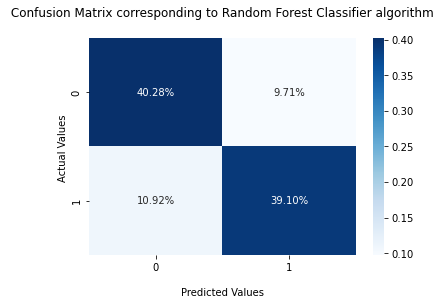

accuracy of Random Forest : 79.37673356175559


In [347]:
#ax = sb.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')
ax = sb.heatmap(cf_matrix_RFC/np.sum(cf_matrix_RFC), annot=True, fmt='.2%', cmap='Blues')
ax.set_title(' Confusion Matrix corresponding to Random Forest Classifier algorithm \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
# plt.savefig("cf_matrix_KNN.png",bbox_inches='tight' )
plt.show()
print("accuracy of Random Forest :", RFC_acc)

When the target variable's actual and anticipated values are both 0, this quadrant contains 41.51 percent of observations; when the target variable's actual and anticipated values are both 1, 8.48 percent of observations fall into this quadrant; when the target variable's actual and anticipated values are both 0, 11.56 percent of observations fall into this quadrant; and when the target variable's actual and anticipated values are both 1, 38.46 percent of observations fall into this quadrant.
This model is correct 80% of the time and erroneous 20% of the time, according to the data.


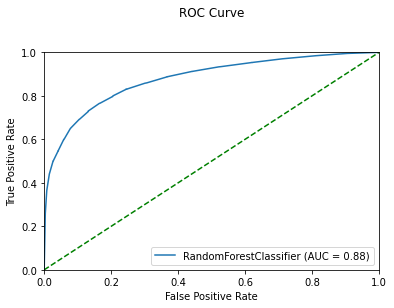

In [238]:
RFC.fit(X_train,y_train)
metrics.plot_roc_curve(RFC, X_test, y_test) 
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve\n\n')
#plt.savefig("ROC Curve.png",bbox_inches='tight' )
plt.show()

from the above graph ,area under the curve score  is 0.88. it show that it is a  perfect classifier.

In [354]:
print(classification_report(y_test,RFC_predicted))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6127
           1       0.80      0.78      0.79      6131

    accuracy                           0.79     12258
   macro avg       0.79      0.79      0.79     12258
weighted avg       0.79      0.79      0.79     12258

